In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)

In [3]:
data = pd.read_csv('zomato.csv', encoding='latin-1')

In [4]:
data_country_code = pd.read_excel('Country-Code.xlsx')

In [5]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
data_country_code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


The size of dataset 9551 rows and 21 columns

In [7]:
data.shape

(9551, 21)

List of column names. It has all details related to a restaurant such as its locality, address, longitude-latitude, whether a restaurant has online delivery service available, whether the restaurant has table booking or not(the restaurant could also be ghost kitchen), ratings related to restaurant.

In [8]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Here we can see what columns are of what type int, float, object. We can see Cuisines has some missing values.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**"Average Cost of two"** mean is 1199.21 and median is 250 therefore we can say that the data is right skewed. Same goes for **Votes** column mean is much greater than median hence it is also right skewed.

The skewness is mainly because an outlier data is present.

In [10]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### Missing Values

We can see there are 9 missing values in Cuisines column

In [11]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Here is aother code block where we can get the name of column that has missing values.

In [12]:
[features for features in data.columns if data[features].isnull().sum()]

['Cuisines']

<AxesSubplot:>

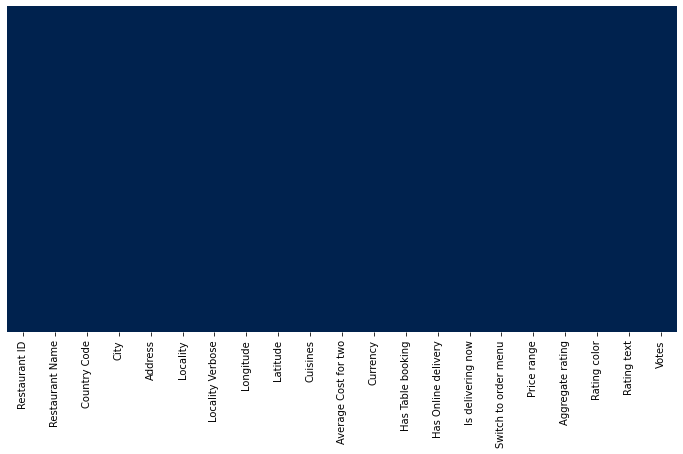

In [13]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="cividis")

We can combine both dataframes.

In [14]:
main_data = pd.merge(data, data_country_code, on="Country Code", how="left")

In [15]:
main_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


Now lets see what all countries we have in our dataset.

We have 8652 records related to India, 432 records related to USA, 80 records related to UK and so on.

We can say maximum number of transactions we have in India then in any other countries.

In [16]:
main_data['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
South Africa        60
Brazil              60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Sri Lanka           20
Singapore           20
Qatar               20
Canada               4
Name: Country, dtype: int64

Pie chart of top 3 countries that use Zomato

([<matplotlib.patches.Wedge at 0x1b987f61760>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.1752164172782067, -0.24262393237225416, 'United States'),
  Text(1.299511336360904, -0.03564108120550632, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.6855429100789538, -0.14153062721714824, '4.73%'),
  Text(0.7996992839144025, -0.021932973049542347, '0.87%')])

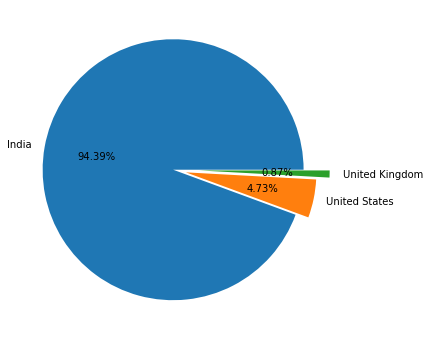

In [17]:
plt.pie(main_data.Country.value_counts().values[:3], labels=main_data.Country.value_counts().index[:3], autopct="%.2f%%", explode=[0.0, 0.1, 0.2])

Maximum number of transactions city-wise

In [18]:
main_data["City"].value_counts()

New Delhi      5473
Gurgaon        1118
Noida          1080
Faridabad       251
Ghaziabad        25
               ... 
Cochrane          1
Lakeview          1
Paynesville       1
Mohali            1
Princeton         1
Name: City, Length: 141, dtype: int64

From the pie chart below we have maximum transactions all from Indian cities. In them New Delhi is at top with 68.9% then Gurgaon with 14.1% then Noida with 13.6% then Faridabad with 3.2% then Ghaziabad with 0.3%.

([<matplotlib.patches.Wedge at 0x1b987fbb520>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0680373001306968, -1.1980696665014625, 'Gurgaon'),
  Text(1.0387053448466343, -0.7817232288905291, 'Noida'),
  Text(1.3901005259557102, -0.16619424700529922, 'Faridabad'),
  Text(1.499926745462198, -0.014824245248222623, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.9%'),
  Text(0.0396884250762398, -0.698873972125853, '14.1%'),
  Text(0.6392032891363904, -0.4810604485480178, '13.6%'),
  Text(0.8936360524000992, -0.10683915878912091, '3.2%'),
  Text(0.9999511636414653, -0.009882830165481749, '0.3%')])

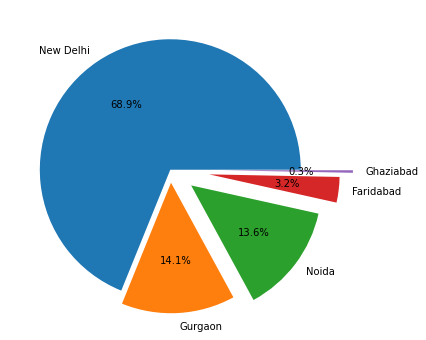

In [19]:
plt.pie(main_data.City.value_counts().values[:5], labels=main_data.City.value_counts().index[:5], autopct="%.1f%%", explode=[0.0, 0.1, 0.2, 0.3, 0.4])

In [20]:
ratings_group = main_data.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0: 'Rating Count'})

From here we can observe that 
- For about 2148 rating count we have 0 ratings. Which means they have not rated zomato app.
- When ratings is between 4.5 to 4.9 it indicates Excellent.
- When ratings is between 4.0 to 4.4 it indicates Very Good.
- When ratings is between 3.5 to 3.9 it indicates Good.
- When ratings is between 2.5 to 3.4 it indicates Average.
- When ratings is between 1.8 to 2.4 it indicates Poor.

In [21]:
ratings_group

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


- Not rated is very high
- Maximum number of ratings is between 2.5 - 3.4

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

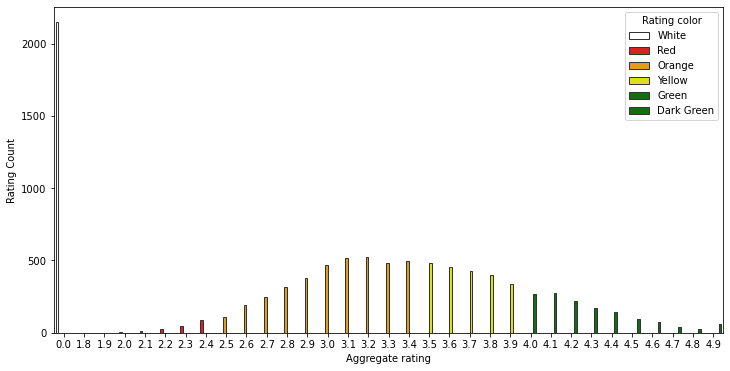

In [22]:
sns.barplot(data=ratings_group, x="Aggregate rating", y="Rating Count", hue="Rating color", palette=['white', 'red', 'orange', 'yellow', 'green', 'green'], edgecolor=".2")

Text(0, 0.5, 'Frequency')

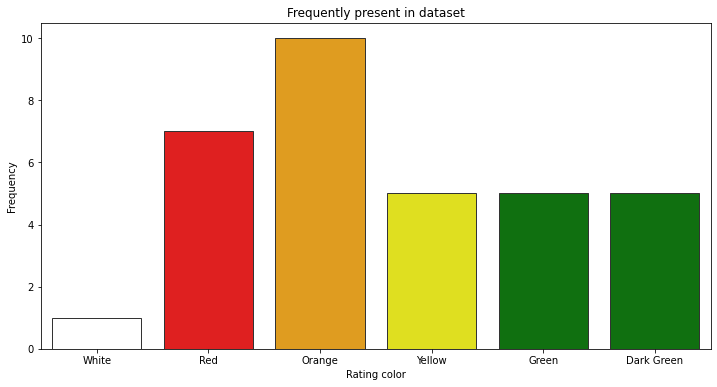

In [23]:
sns.countplot(x="Rating color", data=ratings_group, palette=['white', 'red', 'orange', 'yellow', 'green', 'green'], edgecolor=".2")
plt.title('Frequently present in dataset')
plt.ylabel('Frequency')

Below we are trying to find which all countries have given 0 ratings to zomato. Out of them India is on top with 2139 count.

In [24]:
main_data[main_data["Aggregate rating"] == 0]["Country"].value_counts().reset_index()

,index,Country
0,India,2139
1,Brazil,5
2,United States,3
3,United Kingdom,1


Here we are able to determine which country uses which currency.

In [25]:
main_data.groupby(["Country","Currency"]).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [26]:
main_data.groupby(["Has Online delivery", "Country"]).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [27]:
main_data[main_data["Has Online delivery"] == "Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Country'>

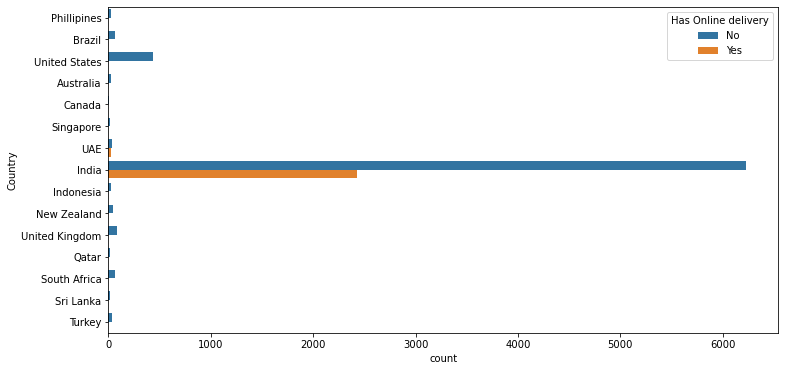

In [28]:
sns.countplot(data=main_data, y="Country", hue="Has Online delivery")

By comparing above two code blocks we came to know that India and UAE have online deliveries only. But by looking at the code above this code block we see that for some places in India and UAE there are no online deliveries.

From the Pie chart below we can see that more than 25% of restaurants do not offer online deliveries. This is not for any specific country, its in whole dataset.

([<matplotlib.patches.Wedge at 0x1b989157a00>,
 [Text(-0.7614681082348078, 0.7938301582462732, 'Yes'),
  Text(0.8306925627911429, -0.8659964584936148, 'No')],
 [Text(-0.41534624085534966, 0.4329982681343308, '74.34%'),
  Text(0.4845706616281667, -0.5051646007879419, '25.66%')])

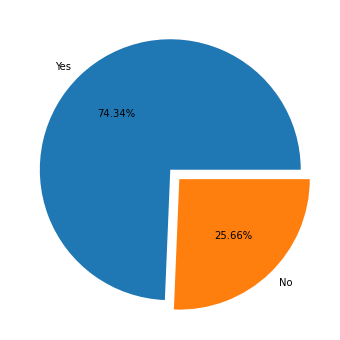

In [29]:
plt.pie(main_data["Has Online delivery"].value_counts(), labels=["Yes", "No"], autopct="%.2f%%", explode=[0.0, 0.1])

List of cities in India and UAE that offer Online Deliveries.

In [30]:
main_data[main_data["Has Online delivery"] == "Yes"].groupby(["Country", "City"]).size().reset_index()

,Country,City,0
0,India,Ahmedabad,11
1,India,Bangalore,7
2,India,Chandigarh,6
3,India,Chennai,13
4,India,Coimbatore,7
5,India,Faridabad,35
6,India,Ghaziabad,10
7,India,Gurgaon,425
8,India,Hyderabad,7
9,India,Jaipur,10


In [31]:
main_data[main_data["Has Online delivery"]=="No"].Country.value_counts().reset_index()

,index,Country
0,India,6229
1,United States,434
2,United Kingdom,80
3,South Africa,60
4,Brazil,60
5,New Zealand,40
6,Turkey,34
7,UAE,32
8,Australia,24
9,Phillipines,22


In [32]:
main_data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

Top 20 Restaurants with mean aggregate ratings.

<AxesSubplot:xlabel='Restaurant Name'>

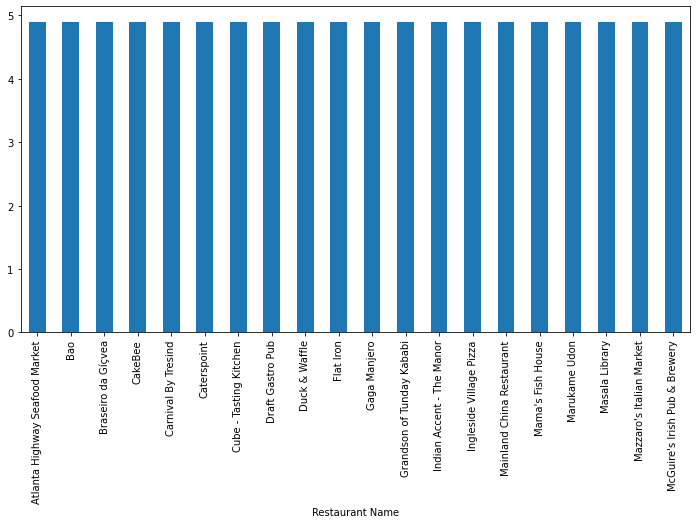

In [33]:
main_data.groupby("Restaurant Name")["Aggregate rating"].mean().nlargest(20).plot.bar()

Restaurants with highest number of chains as shown in barplot.

Cafe Coffe Day has highest more than 80 then at second place is Domino's Pizza at third is Subway and so on.

Text(0.5, 0, 'Total chains')

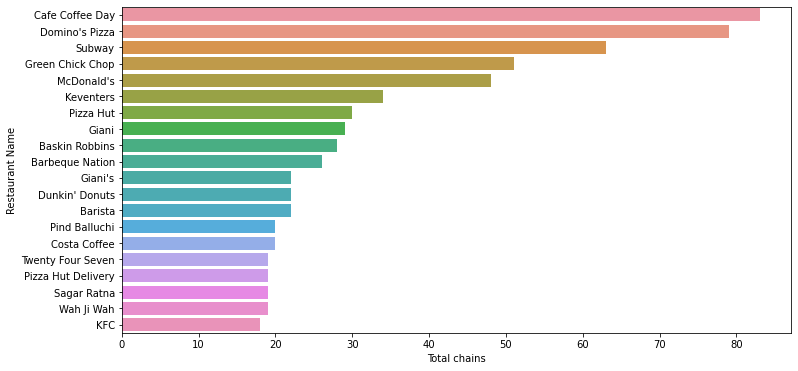

In [34]:
sns.barplot(x=main_data["Restaurant Name"].value_counts()[:20], y=main_data["Restaurant Name"].value_counts()[:20].index)
plt.ylabel("Restaurant Name")
plt.xlabel("Total chains")

Restaurants that provide and do not provide table booking.

By looking at the pie chart below we can say that nearly 12% of restaurants provide table bookings.

([<matplotlib.patches.Wedge at 0x1b9898cdd60>,
 [Text(-1.021163989556697, 0.4089304420468722, 'No'),
  Text(1.1139971004001212, -0.4461058846284392, 'Yes')],
 [Text(-0.5569985397581984, 0.223052968389203, '87.88%'),
  Text(0.6498316419000706, -0.26022843269992285, '12.12%')])

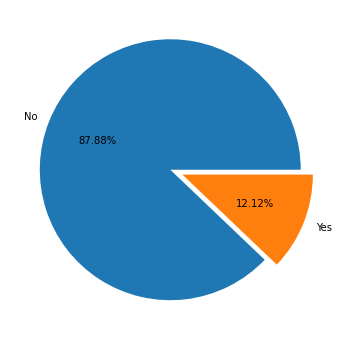

In [35]:
plt.pie(main_data["Has Table booking"].value_counts(), labels=main_data["Has Table booking"].value_counts().index, autopct="%.2f%%", explode=[0.0, 0.1])

In [36]:
main_data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

Top 10 cities with highest number of votes.

Bangalore is highest then at 2nd place is New Delhi then at 3rd place is Kolkata. At 8th place we have Tampa Bay and at 10th place we have Dubai.

<AxesSubplot:xlabel='City'>

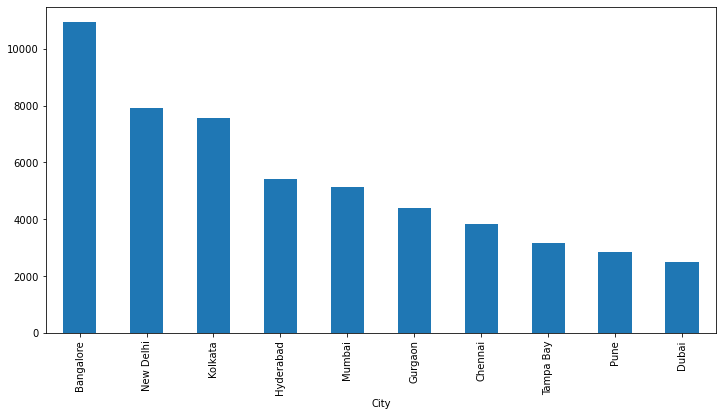

In [37]:
main_data.groupby("City")["Votes"].max().nlargest(10).plot.bar()

Here we have Top 20 Restaurants with City and largest Votes

- We can see Toit in Bangalore has highest with 10934 votes
- Truffles in Bangalore with 9667 votes
- Hauz Khas Social in New Delhi with 7931 votes
- Peter Cat in Kolkata with 7574 votes
- AB's-Absolute Barbecues in Bangalore with 6907 votes
- Barbeques Nation in Kolkata with 5966 votes

In [38]:
main_data.groupby(["City", "Restaurant Name"])["Votes"].max().nlargest(20).reset_index()

,City,Restaurant Name,Votes
0,Bangalore,Toit,10934
1,Bangalore,Truffles,9667
2,New Delhi,Hauz Khas Social,7931
3,Kolkata,Peter Cat,7574
4,Bangalore,AB's - Absolute Barbecues,6907
5,Kolkata,Barbeque Nation,5966
6,Bangalore,Big Brewsky,5705
7,Hyderabad,AB's - Absolute Barbecues,5434
8,Bangalore,The Black Pearl,5385
9,Kolkata,BarBQ,5288


Top 50 restaurants in cities with largest votes

<AxesSubplot:xlabel='Restaurant Name,City'>

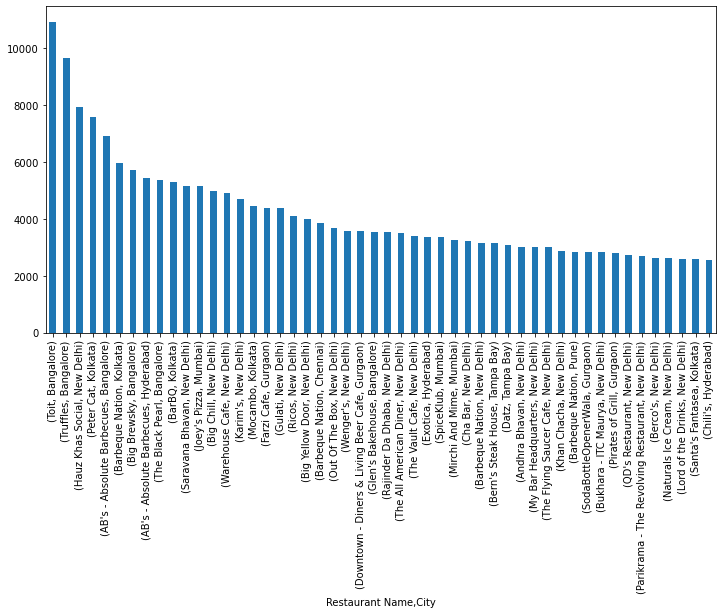

In [39]:
main_data.groupby(["Restaurant Name", "City"])["Votes"].max().nlargest(50).plot.bar()

In [40]:
main_data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

On the left hand side we have the location and on the right hand side we have restaurant name.

In [41]:
main_data.groupby(["Locality"])["Restaurant Name"].unique().reset_index()

,Locality,Restaurant Name
0,"ILD Trade Centre Mall, Sohna Road","[K Lab, Pind Balluchi]"
1,"12th Square Building, Banjara Hills",[Exotica]
2,"A Hotel, Gurdev Nagar",[Basant Restaurant]
3,"ARSS Mall, Paschim Vihar",[Haldiram's]
4,Aaya Nagar,[Food Cloud]
...,...,...
1203,"ibis New Delhi, Aerocity","[The Hub - ibis New Delhi, Frugurpop- ibis N..."
1204,íguas Claras,"[Rovereto, Buena Carne, Taco Pep]"
1205,íayyolu,[Turta Home Cafe]
1206,íukurambar,[Liva]


Below we are able to find out that top 10 number of localities with unique restaurants.

- Connaught Place with highest number 119
- Rajouri Garden with 98
- Defence Colony with 85

In [42]:
main_data.groupby(["Locality"])["Restaurant Name"].nunique().nlargest(10).reset_index().rename(columns={"Restaurant Name": "Number of Restaurants"})

,Locality,Number of Restaurants
0,Connaught Place,119
1,Rajouri Garden,98
2,Defence Colony,85
3,Malviya Nagar,85
4,Pitampura,82
5,Shahdara,82
6,Mayur Vihar Phase 1,81
7,Rajinder Nagar,81
8,Safdarjung,79
9,Satyaniketan,79


### Find top 20 cuisines

From the graph below we can conclude North Indian is most popular, then Chinese, Fast Food, Cafe, Bakery.

C:\Users\Chail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Cuisines')

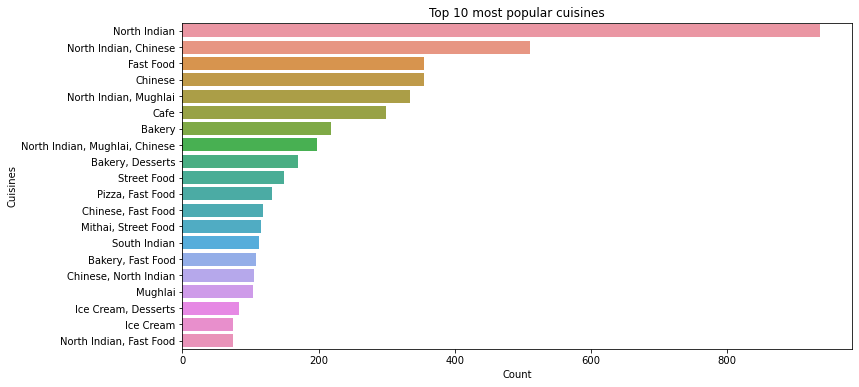

In [43]:
sns.barplot(main_data["Cuisines"].value_counts().nlargest(20), main_data["Cuisines"].value_counts().nlargest(20).index)
plt.title("Top 10 most popular cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisines")

### Cost

In [44]:
main_data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

C:\Users\Chail\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

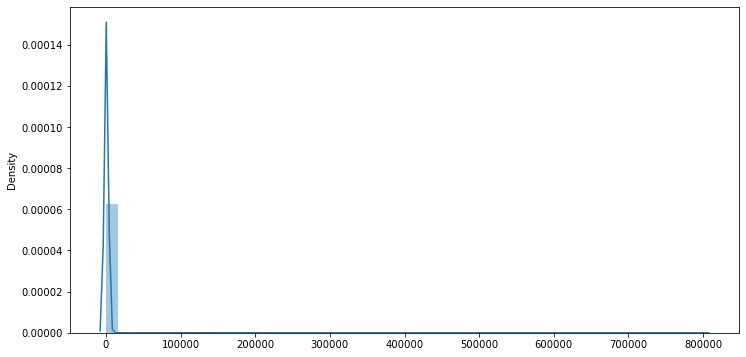

In [45]:
sns.distplot(x=main_data["Average Cost for two"])

By looking at the graph above we can say there are outliers. It is so because we have different countries with different currencies and restaurant charge according to that. So we can get average cost for two people country wise also.

One way is we can either convert Average Cost for two into US dollars for all countries in this way we get same currency cost.

In [46]:
main_data.groupby(["Country"])["Average Cost for two"].mean().reset_index()

,Country,Average Cost for two
0,Australia,24.083333
1,Brazil,134.666667
2,Canada,36.250000
3,India,623.370319
4,Indonesia,281190.476190
5,New Zealand,69.750000
6,Phillipines,1606.818182
7,Qatar,223.750000
8,Singapore,155.750000
9,South Africa,419.733333


We can conclude that
- People in Indonesia on average pay highest for meal of two people.
- People in SriLanka on average pay second highes for meal of two people.
- People in Philipines on average pay third highest for meal of two people.
- People in Australia on average pay least for meal of two people.

Relation between Average cost of two people and aggregate rating.

<AxesSubplot:xlabel='Aggregate rating', ylabel='Average Cost for two'>

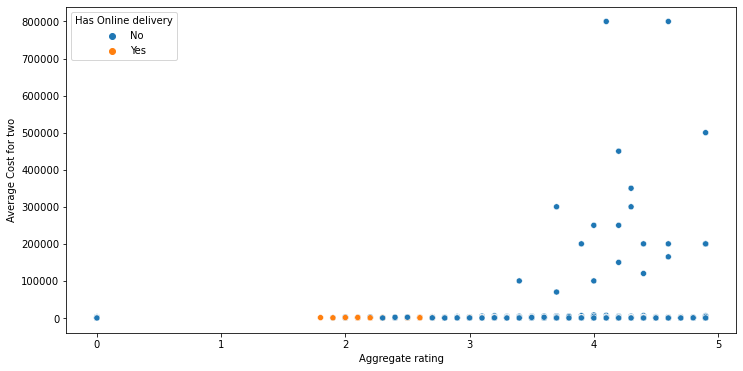

In [47]:
sns.scatterplot(x="Aggregate rating", y="Average Cost for two", data=main_data, hue="Has Online delivery")

Here we have Country with Price range and how many restaurants are there in each price range.

In [48]:
main_data.groupby(["Country", "Price range"]).size().reset_index()

,Country,Price range,0
0,Australia,1,4
1,Australia,2,14
2,Australia,3,5
3,Australia,4,1
4,Brazil,1,2
5,Brazil,2,7
6,Brazil,3,16
7,Brazil,4,35
8,Canada,2,3
9,Canada,4,1


In [49]:
main_data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [50]:
main_data["Price range"] = main_data["Price range"].astype(str)

In [51]:
main_data["Country Code"] = main_data["Country Code"].astype(str)

In [52]:
main_data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code             object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range              object
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

By looking at the table below we can get what is the minimum, maximum and average cost of Two people meal in each country.

In [53]:
main_data.groupby(["Country"])["Average Cost for two"].agg(["min", "max", "mean"])

,min,max,mean
Country,,,
Australia,7,120,24.083333
Brazil,30,400,134.666667
Canada,25,70,36.250000
India,0,8000,623.370319
Indonesia,70000,800000,281190.476190
New Zealand,20,200,69.750000
Phillipines,600,6000,1606.818182
Qatar,50,550,223.750000
Singapore,20,500,155.750000


Hotel name which serves costliest dish in each country

In [54]:
main_data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [55]:
main_data[main_data["Average Cost for two"] == 800000][["Restaurant Name", "Cuisines", "Aggregate rating"]].reset_index()

,index,Restaurant Name,Cuisines,Aggregate rating
0,9283,Skye,"Italian, Continental",4.1
1,9284,Satoo - Hotel Shangri-La,"Asian, Indonesian, Western",4.6


In [56]:
main_data[main_data["Average Cost for two"] == 8000][["Restaurant Name", "Cuisines", "Aggregate rating"]].reset_index()

,index,Restaurant Name,Cuisines,Aggregate rating
0,7543,Orient Express - Taj Palace Hotel,European,4.0


In [57]:
main_data[main_data["Average Cost for two"] == 70][["Restaurant Name", "Cuisines", "Aggregate rating"]].reset_index()

,index,Restaurant Name,Cuisines,Aggregate rating
0,58,Quiosque Chopp Brahma,"Bar Food, Brazilian",0.0
1,64,Gopala Hari,Indian,3.1
2,80,Veloso,"Brazilian, Bar Food, Beverages",4.6
3,91,Henry Campbell's Steakhouse,"Steak, Tapas, Bar Food",3.5
4,148,Chandlers Steakhouse,"American, Seafood, Steak",3.9
5,150,Barbacoa Restaurant,"Latin American, Steak",4.1
6,237,Duck City Bistro,"American, French",3.7
7,262,Tursi's Latin King,"American, Italian",4.1
8,289,Woodfire Grille,"American, Seafood, Steak",3.6
9,330,Downtown Grill,Steak,4.0


In [58]:
main_data[main_data["Average Cost for two"] == 100][["Restaurant Name", "Cuisines", "Aggregate rating"]].reset_index()

,index,Restaurant Name,Cuisines,Aggregate rating
0,32,Rovereto,Pizza,3.1
1,34,Taco Pep,"Mexican, Grill",4.3
2,36,Taypíç,"Peruvian, Latin American",3.6
3,43,Confeitaria Colombo,"Desserts, Cafe",4.8
4,48,Braseiro da Gíçvea,"Brazilian, Bar Food",4.9
...,...,...,...,...
348,9391,Nobu,"Japanese, Sushi",4.4
349,9422,Aalishan,"North Indian, Chinese, Turkish",3.8
350,9519,MasabaôÛ± Kebapí_Û±sÛ±,"Kebab, Turkish Pizza",4.2
351,9522,Meôhur TavacÛ± Recep Usta,Kebab,4.5


In [59]:
main_data[main_data["Average Cost for two"] == 230][["Restaurant Name", "Cuisines", "Aggregate rating"]].reset_index()

,index,Restaurant Name,Cuisines,Aggregate rating
0,35,Coco Bambu,International,4.2
1,39,Coco Bambu,International,4.9
2,73,Kinoshita,Sushi,3.9
3,570,Olive Garden,"Italian, Pizza",4.1
4,9384,Restaurant Gordon Ramsay,French,4.7
5,9451,Jarryds,"Cafe, Burger",4.8


In [60]:
main_data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code             object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range              object
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

All Restaurants in India with Aggregate rating more than 4 and Average Cost for two less than 500.

In [61]:
main_data[(main_data["Aggregate rating"] > 4) & (main_data["Average Cost for two"] < 500) & (main_data["Country"] == "India")][["Restaurant Name", "Cuisines", "Average Cost for two", "City", "Locality"]]

,Restaurant Name,Cuisines,Average Cost for two,City,Locality
637,Sheroes Hangout,"Cafe, North Indian, Chinese",0,Agra,Tajganj
646,Huber & Holly,"Ice Cream, Desserts, Continental",300,Ahmedabad,Bodakdev
653,Cryo Lab,"Desserts, Ice Cream",350,Ahmedabad,Ellis Bridge
654,Swati Snacks,"Fast Food, Street Food, South Indian",450,Ahmedabad,Ellis Bridge
701,Gurdas Ram Jalebi Wala,Mithai,100,Amritsar,Town Hall
...,...,...,...,...,...
9142,Zuka Choco-la,Desserts,300,Puducherry,MG Road
9153,Gelateria Montecatini Terme,Desserts,150,Puducherry,White Town
9216,22nd Parallel,South Indian,400,Vadodara,Alkapuri
9244,Kashi Chat Bhandar,Street Food,150,Varanasi,Godaulia


In [62]:
main_data[(main_data["Aggregate rating"] > 4) & (main_data["Average Cost for two"] < 500) & (main_data["Country"] == "United States")][["Restaurant Name", "Cuisines", "Average Cost for two", "City", "Locality"]]

,Restaurant Name,Cuisines,Average Cost for two,City,Locality
103,Last Resort Grill,"American, Southern, Southwestern",40,Athens,Athens
104,Mama's Boy Restaurant,Southern,10,Athens,Athens
105,Sr. Sol 1,Mexican,10,Athens,Athens
108,Big City Bread Cafe,"Breakfast, Sandwich",10,Athens,Athens
109,Clocked,"American, Burger, Sandwich",10,Athens,Athens
...,...,...,...,...,...
512,Ella's Americana Folk Art Cafe,"International, Italian, Southern",40,Tampa Bay,Seminole Heights
513,Taco Bus,"Mexican, Vegetarian",10,Tampa Bay,Seminole Heights
515,Columbia Restaurant,"Cuban, Spanish",40,Tampa Bay,Ybor City
537,Smok'n Pig B-B-Q,BBQ,25,Valdosta,Valdosta


In [63]:
main_data[(main_data["Aggregate rating"] > 4) & (main_data["Average Cost for two"] < 500) & (main_data["Country"] == "United Kingdom")][["Restaurant Name", "Cuisines", "Average Cost for two", "City", "Locality"]]

,Restaurant Name,Cuisines,Average Cost for two,City,Locality
9343,Bodega,Latin American,40,Birmingham,City Centre
9344,San Carlo,Italian,45,Birmingham,City Centre
9345,Purnell's,Contemporary,120,Birmingham,Colmore Business District
9349,The Plough,British,30,Birmingham,Harborne
9350,Lasan Restaurant,Indian,80,Birmingham,Jewellery Quarter
9358,La Favorita,Italian,30,Edinburgh,Leith
9359,Mimi's Bakehouse,"Cafe, Bakery, Desserts",35,Edinburgh,Leith
9360,Roseleaf Bar Cafe,"Scottish, Cafe",45,Edinburgh,Leith
9361,The Kitchin,"British, French",90,Edinburgh,Leith
9363,Chaophraya,Thai,50,Edinburgh,New Town


Here we can conclude that majority ratings are between 3 and 4. There are low distribution on both tails.

<AxesSubplot:xlabel='Aggregate rating', ylabel='Count'>

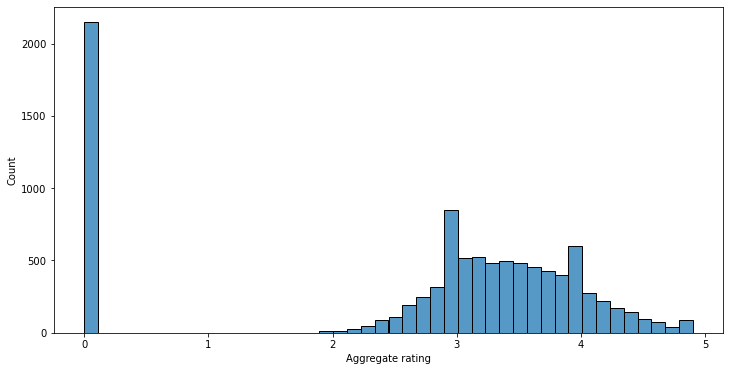

In [64]:
sns.histplot(data=main_data, x="Aggregate rating")

There is heavy skewness in Votes feature. As calculated earlier by using describe()

<AxesSubplot:xlabel='Votes', ylabel='Count'>

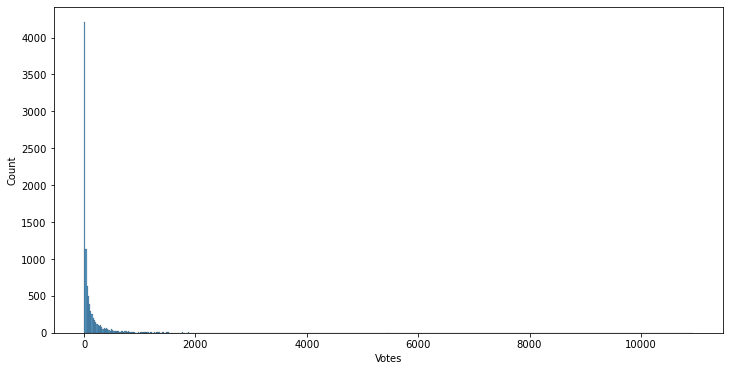

In [65]:
sns.histplot(data=main_data, x="Votes", bins=500)

We have outliers in Aggregate rating feature.

C:\Users\Chail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Aggregate rating'>

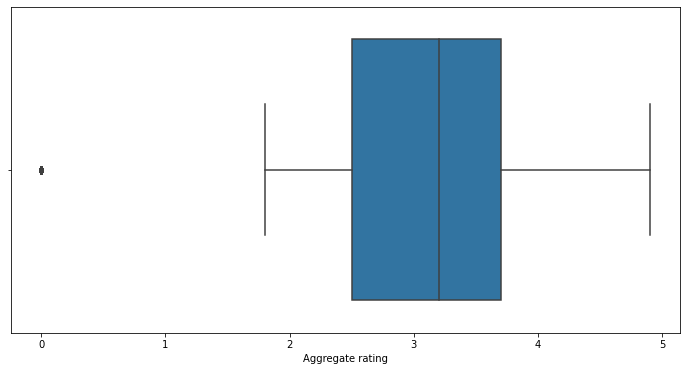

In [66]:
sns.boxplot(main_data["Aggregate rating"])

Votes feature has outliers in it and we need to carefully use it.

C:\Users\Chail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Votes'>

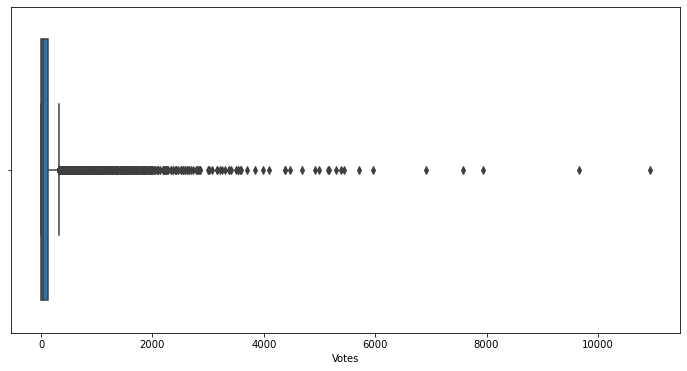

In [67]:
sns.boxplot(main_data["Votes"])

### Geographical analysis

In [68]:
main_data["Locality"].nunique()

1208

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

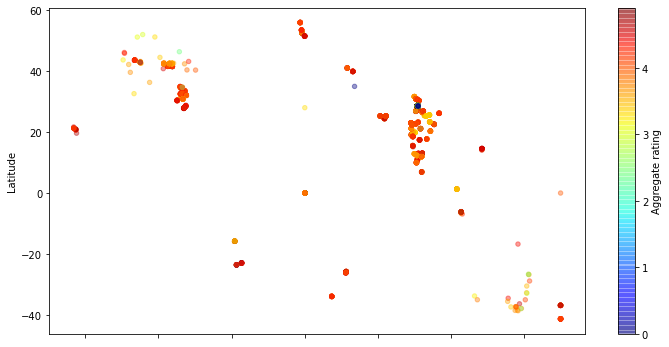

In [69]:
main_data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4, c="Aggregate rating", cmap=plt.get_cmap("jet"))

In [70]:
main_data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code             object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range              object
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

## Feature Engineering

In [71]:
main_data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [72]:
main_data.dropna(axis=0, inplace=True)

In [73]:
main_data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code             object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range              object
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

We need to remove outliers

In [80]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR_cfc = main_data["Average Cost for two"].quantile(0.75) - data["Average Cost for two"].quantile(0.25)

In [83]:
#### Extreme outliers
lower_bridge_cfc = main_data['Average Cost for two'].quantile(0.25) - (IQR_cfc*3)
upper_bridge_cfc = main_data['Average Cost for two'].quantile(0.75) + (IQR_cfc*3)
print(lower_bridge_cfc), print(upper_bridge_cfc)

-1100.0
2050.0


(None, None)

We can standardize the numerical columns.

In [74]:
#from sklearn.preprocessing import StandardScaler

In [75]:
# scaler = StandardScaler()

# scaled_data = scaler.fit_transform(main_data[["Average Cost for two", "Aggregate rating", "Votes"]])

In [76]:
# scaled_data.std(axis=0)

In [77]:
# scaled_data

In [78]:
# main_data[["Average Cost for two", "Aggregate rating", "Votes"]] = scaled_data

In [79]:
# main_data[["Average Cost for two", "Aggregate rating", "Votes"]]